Importing libraries and getting mnist dataset from keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
# from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Loading Data

Importing kaggle dataset from downloaded repository

In [3]:
train = pd.read_csv('digit-recognizer-kaggledataset/train.csv')#data
test = pd.read_csv('digit-recognizer-kaggledataset/test.csv')

In [4]:
train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

Dividing dataset train.csv into train_y and train_x

mnist.load_data?

In [8]:
x_train = train.drop('label',axis=1)        #**x_train**: uint8 NumPy array of grayscale image data with shapes, containing the training data. Pixel values range from 0 to 255.
y_train = train['label'].values             #**y_train**: uint8 NumPy array of digit labels (integers in range 0-9) for the training data.

x_test = test.values                        #**x_test**: uint8 NumPy array of grayscale image data with shapes, containing the test data.
print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))

x_train => (42000, 784)
y_train => (42000,)
x_test => (28000, 784)


Since the images are in square, the dimensions of the arrays are changed to (28,28) from (784)

In [9]:
x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28, 1)
x_test = np.array(x_test).reshape(x_test.shape[0], 28, 28, 1)
print("new \nx_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))

new 
x_train => (42000, 28, 28, 1)
y_train => (42000,)
x_test => (28000, 28, 28, 1)


Data Visualization

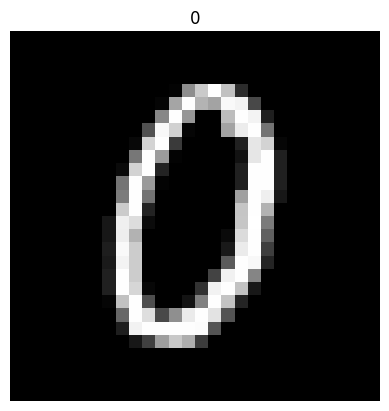

In [10]:
#plt.imshow(train[1]
def display_img(i):
    #img = x_train.iloc[i].values.reshape((28,28))
    plt.imshow(x_train[i],cmap = 'gray')
    plt.title(y_train[i])   #prints number shown in the image
    plt.axis('off')

display_img(5) #diplays the image at index i in train.csv

Pre Processing
Norma

In [11]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

Converting y_train labels(0-9) from scaler to one hot vectors 

In [12]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [13]:
y_train = keras.utils.to_categorical(y_train)

In [14]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

c:\Users\Vanish\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

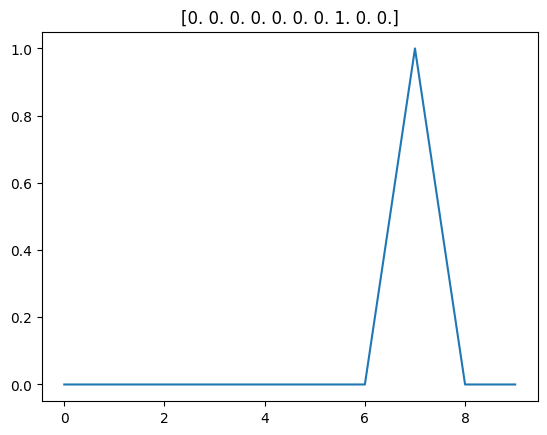

In [15]:
plt.plot(y_train[6])
plt.title(y_train[6])

Building Model

Model 1

In [16]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu') )
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu') )
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))


In [17]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 4, verbose= 1)
mc = ModelCheckpoint("./models/tf_model_1.h5", monitor= "val_accuracy", verbose= 1, save_best_only= True)
c = [es, mc]

In [20]:
train_model = model.fit(x_train, y_train, epochs=5, validation_split=0.3, callbacks=c)

Epoch 1/5
914/919 [============================>.] - ETA: 0s - loss: 0.2691 - accuracy: 0.9206
Epoch 1: val_accuracy improved from -inf to 0.96897, saving model to ./models\tf_model_1.h5
919/919 [==============================] - 10s 10ms/step - loss: 0.2680 - accuracy: 0.9210 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 2/5
917/919 [============================>.] - ETA: 0s - loss: 0.0898 - accuracy: 0.9728
Epoch 2: val_accuracy improved from 0.96897 to 0.98008, saving model to ./models\tf_model_1.h5
919/919 [==============================] - 9s 10ms/step - loss: 0.0898 - accuracy: 0.9728 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 3/5
916/919 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9796
Epoch 3: val_accuracy improved from 0.98008 to 0.98326, saving model to ./models\tf_model_1.h5
919/919 [==============================] - 9s 10ms/step - loss: 0.0656 - accuracy: 0.9796 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 4/5
918/919 [=================

In [33]:
save_model = keras.models.load_model("C:/Users/Vanish/Desktop/code/HandwrittenDigitRecognition/models/tf_model_1.h5")
score = save_model.evaluate(x_train, y_train)


1313/1313 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9892


In [40]:
print(f" the model accuracy is {score[1]*100} %")

 the model accuracy is 98.92380833625793 %


Model 2

In [23]:
# model2 = tf.keras.Sequential([
#         tf.keras.layers.Conv2D(64,(3,3) , input_shape=(28,28,1) , activation='relu'),
#         tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Conv2D(64,(3,3) , input_shape=(28,28,1) , activation='relu'),
#         tf.keras.layers.MaxPooling2D(2,2),

#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128 , activation='relu'),
#         tf.keras.layers.Dense(10 , activation='softmax')

# ])

In [24]:
# model2.compile(optimizer='adam' , loss='sparse_categorical_crossentropy')

In [25]:
# model2.summary()

In [26]:
# model2.fit(x_train ,y_train ,epochs=5)